# Problem description:
Our business goal is to maximize the Life Span (LS) of one of our consumables (Consumable A), which is measured in cycles. 
Average LS today is about 9,500 cycles. Our main concern is when the Consumable lives less than 5,000 cycles.

We suspect that several physical parameters in the printing press might contribute to or harm Consumable A LS.

The relevant parameters are: Temperature at location 1 (Temp@1), Temperature at location 2 (Temp@2), flow, dirtiness, filter pressure.

The current set point (target value) for Temp@1 is 280 (28.0˚) and for Temp@2 is 250 (25.0˚).

The parameters are all measured and recorded several times throughout the Consumable life. Measurements should be registered approximately every 2,000 cycles (may be more frequently), so each consumable has several readings.

In addition, we have 20 press types in a field, each type has different LS distribution for Consumable A.


### We are being asked for insights as to how to optimize our Consumable A LS, for all press types.



## Data:
2 data sets are given:
* <b> LS data for Consumable A with the following parameters:</b>
    - Press number
    - Consumable Removal_dateTime
    - Consumable Install_datetime
    - Consumable ID
    - Consumable LS (Printed cycles)
    - Press type

<u> Important notes: </u> When the consumable is removed it can’t be re-installed again (single usage). Printing can only occur when a consumable of type A is installed on the press (so when one is removed, another must immediately be installed) and print cycles only increase when the press prints. 

* <b> Parameter measurements with the following parameters: </b>
    - Press Number
    - event_datetime
    - Temp@1
    - Temp@2
    - Flow
    - Dirtiness
    - filter_pressure 


## The Assignment 

1.	<u>Join the data sets in a meaningful way to allow analyzing the effects of the physical parameters on consumable A lifespan. </u>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.close('all')
sns.set()

In [2]:
df_LS=pd.read_csv("LS data for consumable A.csv")
df_LS = df_LS.drop_duplicates()
df_Param=pd.read_csv("Parameter Measurements1.csv")
df_Param=df_Param.sort_values(by=[df_Param.columns[0],df_Param.columns[1]])
df_Param = df_Param.drop_duplicates()
Param_length=len(df_Param)
print("# of rows:",Param_length)
print(df_Param.info())
df_Param.head()

# of rows: 732257
<class 'pandas.core.frame.DataFrame'>
Int64Index: 732257 entries, 273469 to 690880
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Press Number     732257 non-null  int64 
 1   event_datetime   732257 non-null  object
 2   Temp@1           732257 non-null  int64 
 3   Temp@2           732257 non-null  int64 
 4   flow             732257 non-null  object
 5   dirtiness        732257 non-null  int64 
 6   filter_pressure  732203 non-null  object
dtypes: int64(4), object(3)
memory usage: 44.7+ MB
None


,Press Number,event_datetime,Temp@1,Temp@2,flow,dirtiness,filter_pressure
273469,921000012,2021/10/03 7:56:53.000 AM,272,282,4308,803,879
273470,921000012,2021/10/25 10:07:49.000 AM,277,291,4248,803,1022
5188,921000015,2021/09/01 10:25:17.000 AM,279,260,4458,674,424
5189,921000015,2021/09/01 10:57:55.000 AM,270,256,4410,674,426
3866,921000015,2021/09/01 12:14:48.000 PM,271,260,4428,674,427


In [3]:
df_Param=df_Param.replace(['not available','NULL'],np.nan,regex=True)
df_LS=df_LS.replace(['not available','NULL'],np.nan,regex=True)
df_Param["flow"]=pd.to_numeric(df_Param.flow)
df_Param["filter_pressure"]=pd.to_numeric(df_Param.filter_pressure)
df_Param.describe()

,Press Number,Temp@1,Temp@2,flow,dirtiness,filter_pressure
count,7.322570e+05,732257.000000,732257.000000,652568.000000,732257.000000,506882.000000
mean,9.265212e+08,289.288677,262.320642,4276.491992,874.083547,595.959705
std,2.360113e+06,20.737018,30.720467,640.639197,180.748190,514.641487
min,9.210000e+08,-37.000000,0.000000,0.000000,0.000000,-90.000000
25%,9.240004e+08,275.000000,241.000000,4086.000000,775.000000,196.000000
50%,9.280003e+08,283.000000,258.000000,4248.000000,949.000000,548.000000
75%,9.283000e+08,301.000000,280.000000,4404.000000,1000.000000,877.000000
max,9.285015e+08,403.000000,453.000000,126444.000000,1062.000000,5243.000000


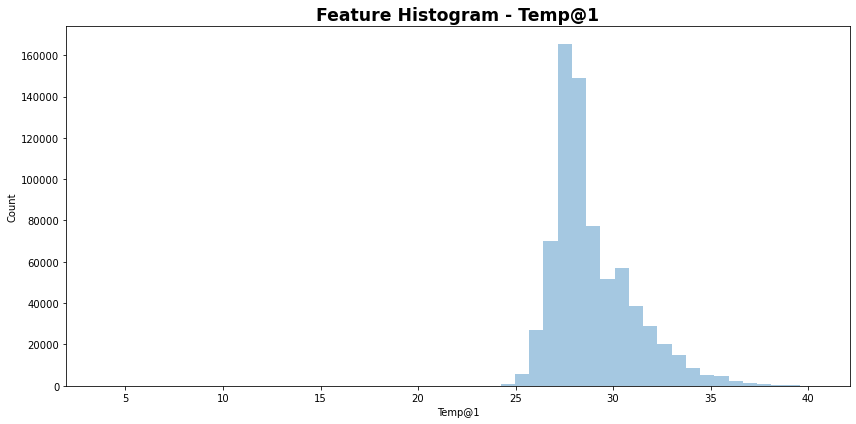

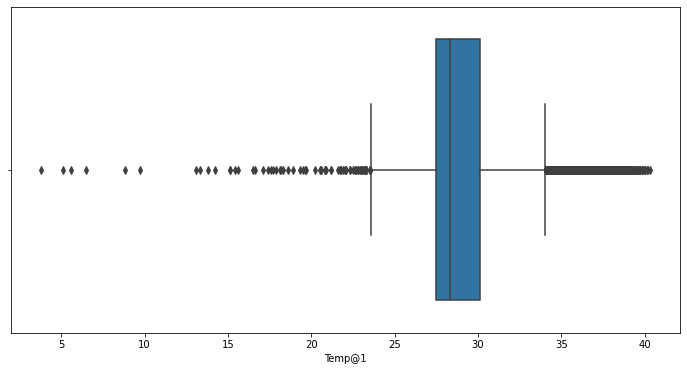

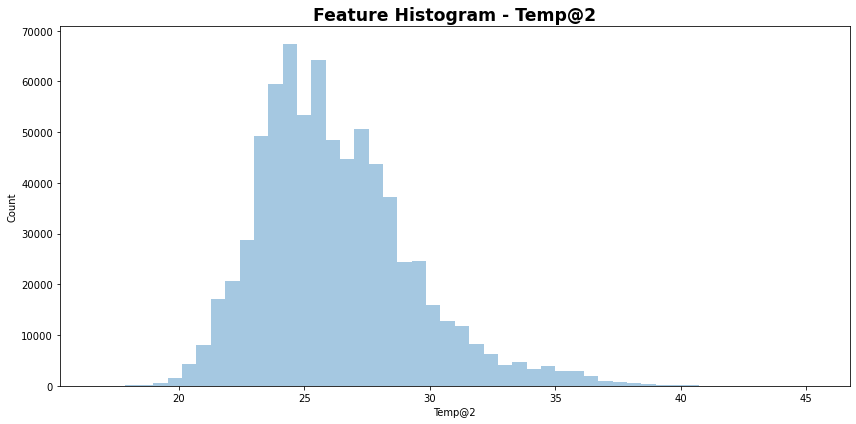

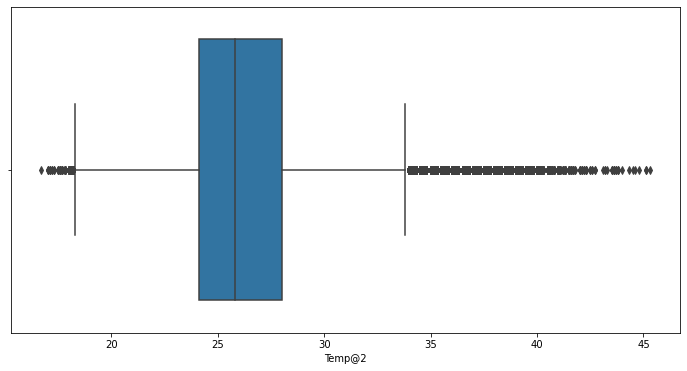

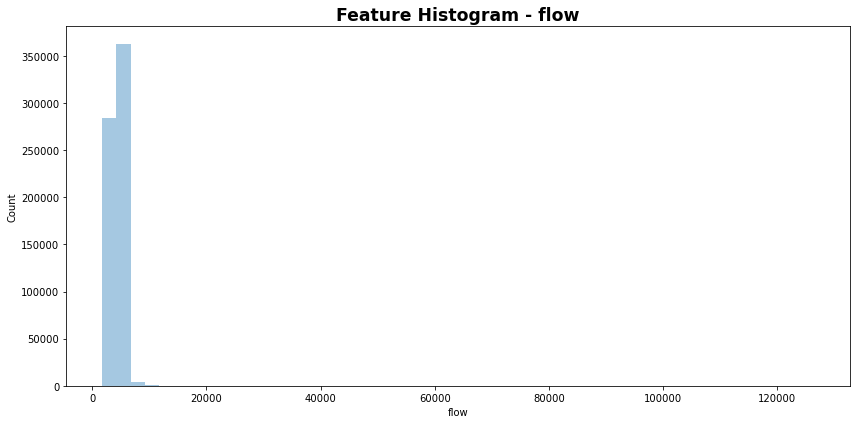

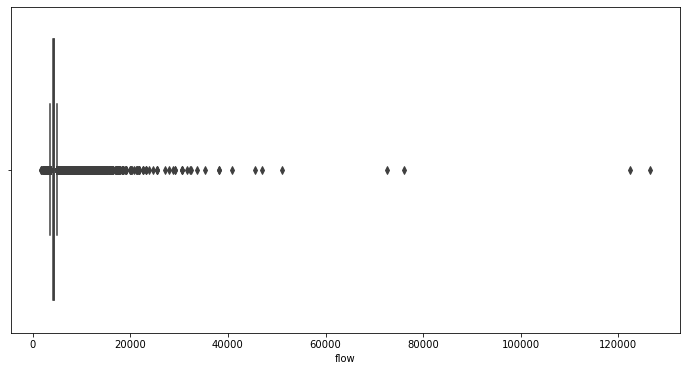

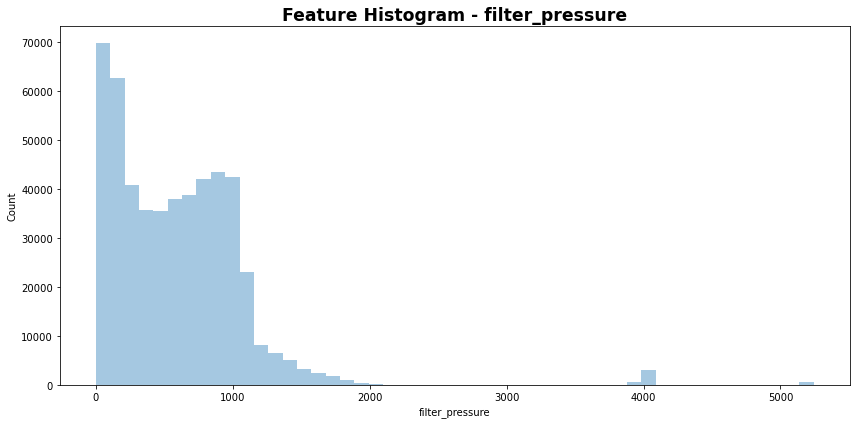

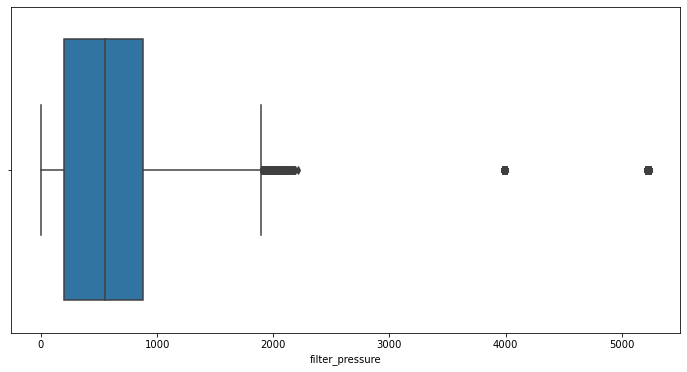

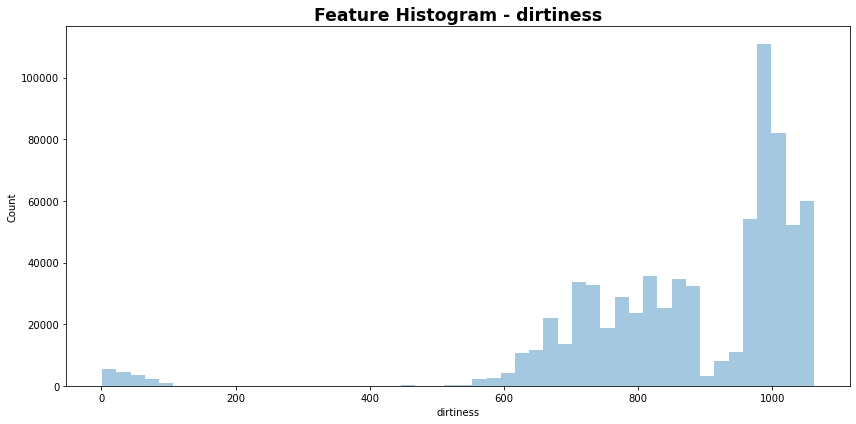

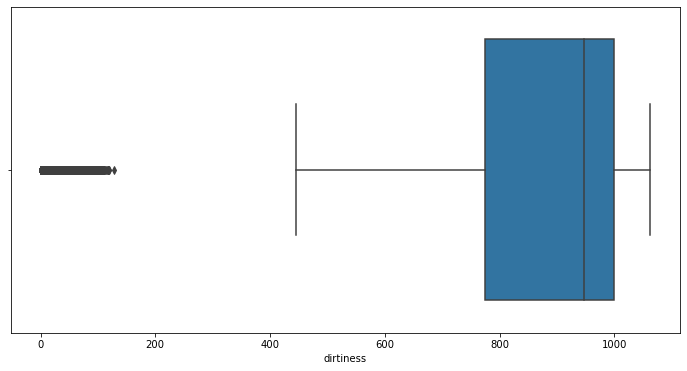

In [4]:
#Physical properties shouldn't be negetive, therefore all temps from 0 and bellow should be dropped.
df_Param = df_Param.drop(df_Param[df_Param["Temp@1"] <= 0].index)
df_Param = df_Param.drop(df_Param[df_Param["Temp@2"] <= 0].index)
df_Param = df_Param.drop(df_Param[df_Param["flow"] <= 0].index)
df_Param = df_Param.drop(df_Param[df_Param["dirtiness"] <= 0].index)
df_Param = df_Param.drop(df_Param[df_Param["filter_pressure"] <=0].index)
df_Param["Temp@1"]=df_Param["Temp@1"]/10
df_Param["Temp@2"]=df_Param["Temp@2"]/10
num_features = ["Temp@1","Temp@2","flow","filter_pressure","dirtiness"]
#See how the data is distributed:
for feature in num_features:
    plt.figure(figsize=(12, 6))
    sns.distplot(df_Param[feature].dropna(),kde=False)
    plt.title("Feature Histogram - " + feature,fontsize='xx-large', fontweight='bold')
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df_Param[feature])

**Outliers are defined as 1.5 x Q3 value (75th percentile)**
- Temperautres @ 1 & 2 below 10C are seems not realistic for press, therefore they are considers as outliers
- Dirtiness below 200 is also considers too far from minimum percentile. **I don't have much information about realistic values of dirtiness**
- flow feature beyond 8000 may be machine fault and too far from maximum percentile. Flow must be more than 0 to operate
- Filter pressure beyond 2500 may be machine fault and too far from maximum percentile. Pressure must be more than 0 to operate

In [5]:
df_Param = df_Param.drop(df_Param[df_Param["Temp@1"] < 10].index)
df_Param = df_Param.drop(df_Param[df_Param["Temp@2"] < 10].index)
df_Param = df_Param.drop(df_Param[df_Param["dirtiness"] < 200].index)
df_Param = df_Param.drop(df_Param[df_Param["filter_pressure"] > 2500].index)
df_Param = df_Param.drop(df_Param[df_Param["flow"] > 8000].index)
df_Param = df_Param.drop(df_Param[df_Param["flow"] < 2000].index)
print("# of deleted rows:",Param_length-len(df_Param))
df_Param.describe()

# of deleted rows: 23888


,Press Number,Temp@1,Temp@2,flow,dirtiness,filter_pressure
count,7.083690e+05,708369.000000,708369.000000,636716.000000,708369.000000,499818.000000
mean,9.266653e+08,28.893352,26.165264,4257.397876,893.151912,566.440648
std,2.219435e+06,2.037319,2.989223,423.842032,130.165605,391.403613
min,9.210000e+08,13.100000,16.700000,2118.000000,445.000000,1.000000
25%,9.240004e+08,27.500000,24.100000,4086.000000,785.000000,196.000000
50%,9.280003e+08,28.300000,25.700000,4248.000000,956.000000,544.000000
75%,9.283000e+08,29.900000,27.800000,4398.000000,1001.000000,870.000000
max,9.285015e+08,40.300000,45.300000,7998.000000,1062.000000,2210.000000


For merging the two datasets, I'll test where each event is belonging between install and removal dates

In [6]:
df_Param['event_datetime']=pd.to_datetime(df_Param.event_datetime)
df_LS['Consumable Install_datetime']=pd.to_datetime(df_LS['Consumable Install_datetime'])
df_LS['Consumable Removal_dateTime']=pd.to_datetime(df_LS['Consumable Removal_dateTime'])
#Find event bewween install and removal dates and copy features from LS data
df_Param_c=df_Param.copy()
ID_lst=[] ; pressT_lst=[] ; LS_lst=[]
uniqe_pres=df_Param[df_Param.columns[0]].unique()
for i in range(len(uniqe_pres)):
    pres_num=uniqe_pres[i]
    df_LS_pres_num=df_LS.loc[df_LS[df_LS.columns[0]] == pres_num]
    df_Param_pres_num=df_Param.loc[df_Param[df_Param.columns[0]] == pres_num]
    for date_Param in range(len(df_Param_pres_num)):
        event=df_Param_pres_num['event_datetime'].iloc[date_Param]
        instal=df_LS_pres_num.loc[lambda df_LS_pres_num: df_LS_pres_num['Consumable Install_datetime'] < event, :]
        remove=instal.loc[lambda instal: instal['Consumable Removal_dateTime'] > event, :]  
        if remove.empty:
            ID_lst.append(np.nan)
            LS_lst.append(np.nan)
            pressT_lst.append(np.nan)
        else:
            ID_lst.append(remove["Consumable ID"].values[0])
            LS_lst.append(remove["Consumable LS (Printed cycles)"].values[0])
            pressT_lst.append(remove["Press type"].values[0])
df_Param_c["Consumable ID"]=ID_lst
df_Param_c["Consumable LS (Printed cycles)"]=LS_lst
df_Param_c["Press type"]=pressT_lst
df_Param_c=df_Param_c.set_index('Press Number')
df_Param_c.head()

,event_datetime,Temp@1,Temp@2,flow,dirtiness,filter_pressure,Consumable ID,Consumable LS (Printed cycles),Press type
Press Number,,,,,,,,,
921000012,2021-10-03 07:56:53,27.2,28.2,4308.0,803,879.0,P293289,19298.0,1.0
921000012,2021-10-25 10:07:49,27.7,29.1,4248.0,803,1022.0,P300568,13247.0,1.0
921000015,2021-09-01 10:25:17,27.9,26.0,4458.0,674,424.0,P283894,15718.0,10.0
921000015,2021-09-01 10:57:55,27.0,25.6,4410.0,674,426.0,P283894,15718.0,10.0
921000015,2021-09-01 12:14:48,27.1,26.0,4428.0,674,427.0,P283894,15718.0,10.0


2.	<u>Explore the data, clean it, exclude suspicious rows, deal with missing values. Explain in words, code or visualizations what assumptions you checked or steps you took to ensure you’re optimizing your usable data. </u>


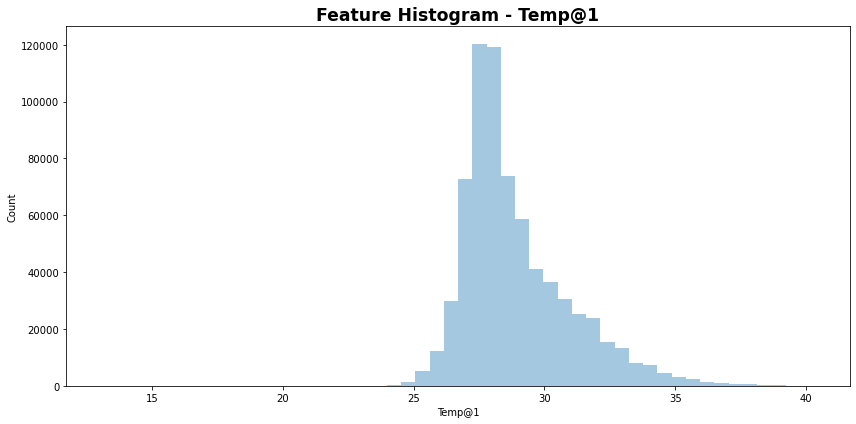

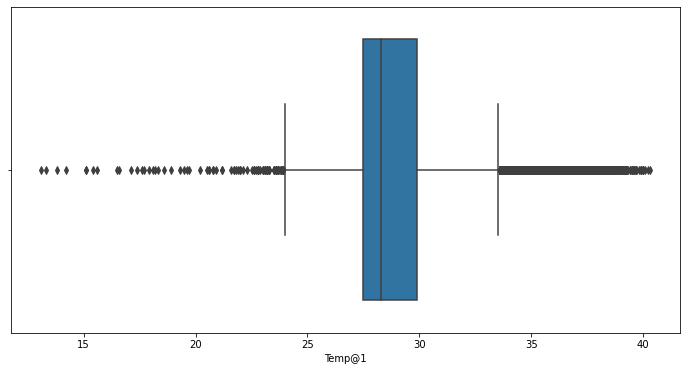

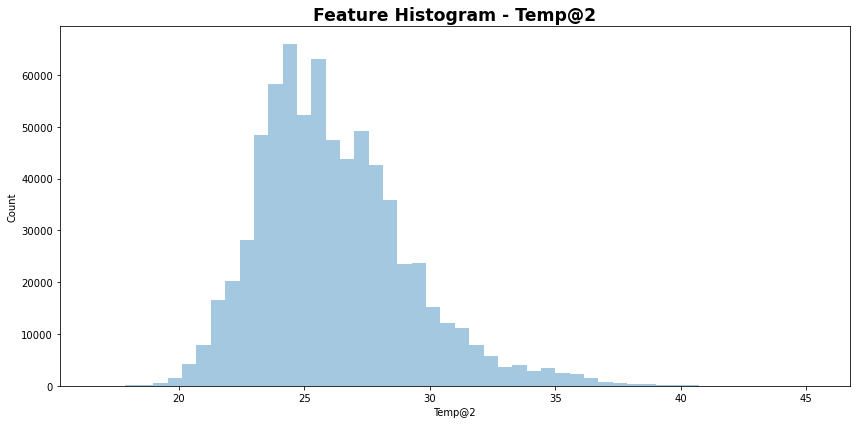

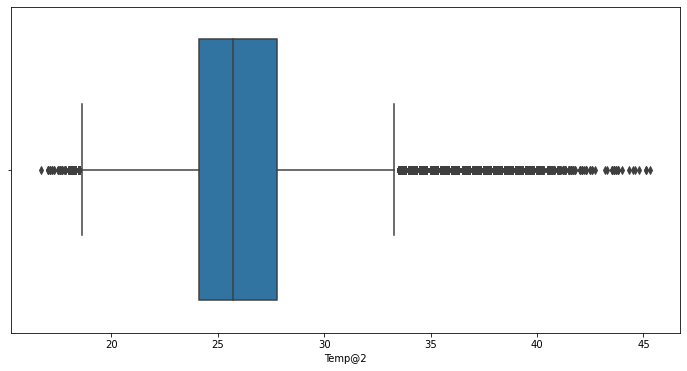

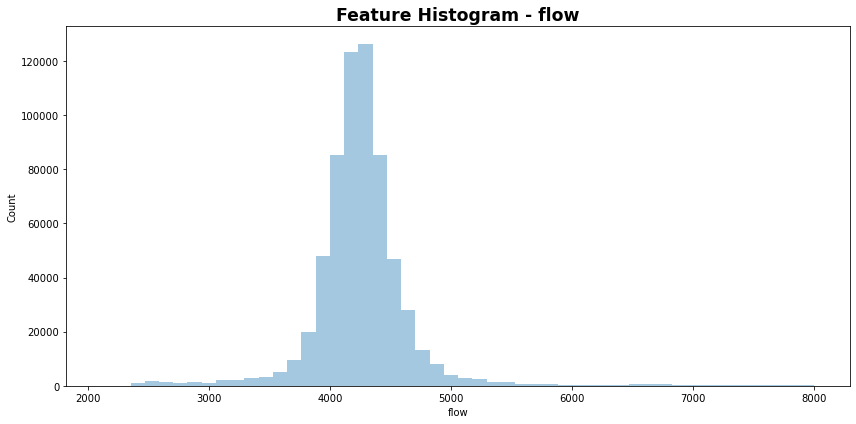

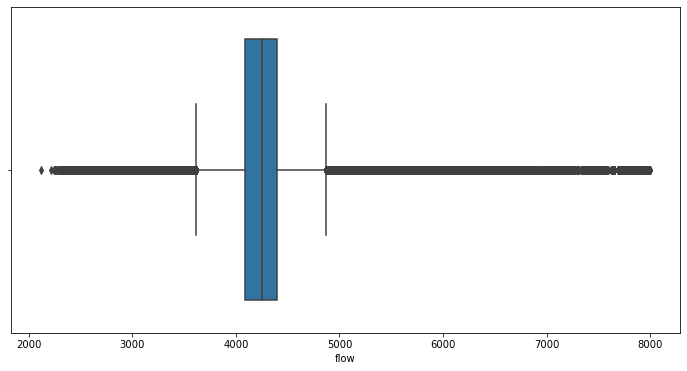

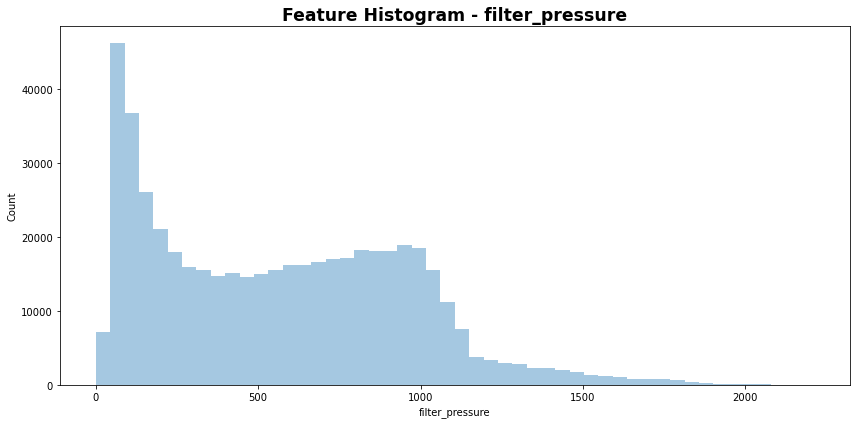

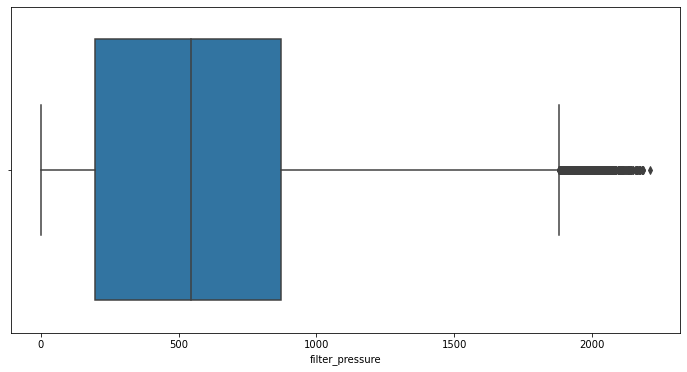

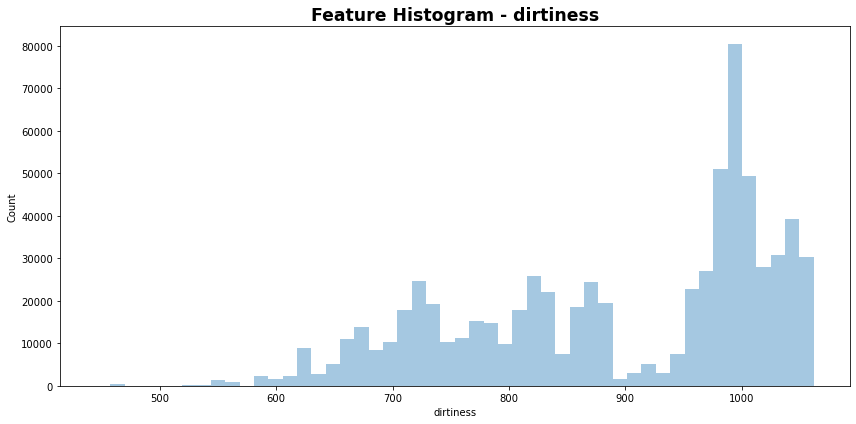

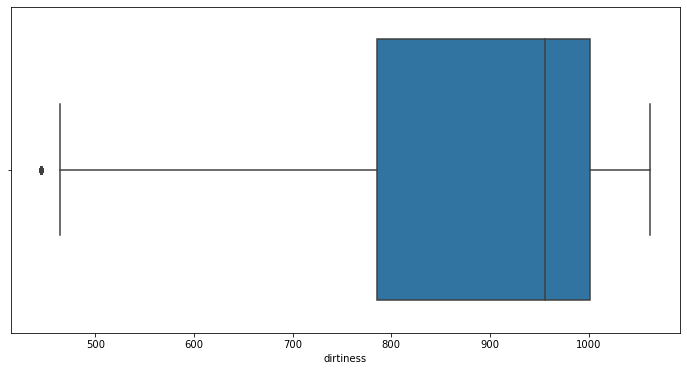

In [7]:
for feature in num_features:
#devide for economic 
    plt.figure(figsize=(12, 6))
    sns.distplot(df_Param_c[feature].dropna(),kde=False)
    plt.title("Feature Histogram - " + feature,fontsize='xx-large', fontweight='bold')
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df_Param[feature])

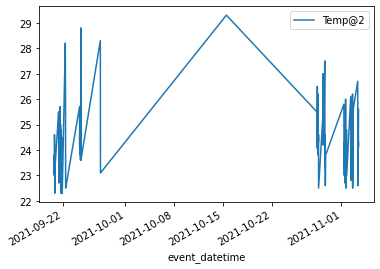

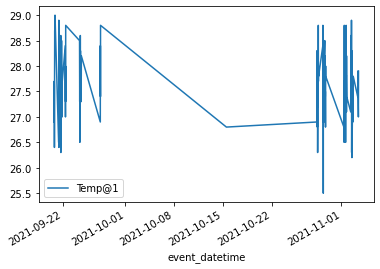

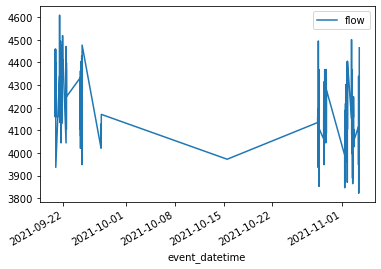

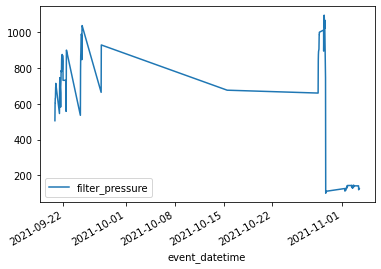

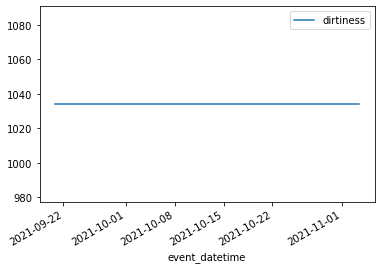

In [8]:
#checking how the most frequent ID is changing by time: 
max_val=df_Param_c['Consumable ID'].value_counts().idxmax()
max_val_s=df_Param_c.loc[df_Param_c['Consumable ID'] == max_val]
max_val_s.plot(x='event_datetime',y='Temp@2')
max_val_s.plot(x='event_datetime',y='Temp@1')
max_val_s.plot(x='event_datetime',y='flow')
max_val_s.plot(x='event_datetime',y='filter_pressure')
max_val_s.plot(x='event_datetime',y='dirtiness')

In [9]:
df_Param_c2=df_Param_c.copy()
# Present NaN % in each feature. 
(100*df_Param_c2.isna().sum()/df_Param_c2.shape[0]).round(1)

event_datetime                     0.0
Temp@1                             0.0
Temp@2                             0.0
flow                              10.1
dirtiness                          0.0
filter_pressure                   29.4
Consumable ID                      4.0
Consumable LS (Printed cycles)     4.0
Press type                         4.0
dtype: float64

~30% of missing values for filter pressure.
Overall there is a lot of rows, so I will delete missing data (I also don't wan't to interpolate and by that biased the data to median or another value).

In [10]:
df_Param_c2=df_Param_c2.dropna()
df_Param_c2["Press type"]=df_Param_c2["Press type"].astype('int')

3.	<u>Create a new data set in which each Consumable ID has 1 row. Create as many meaningful  features as you can from the data provided in this dataset. </u>


Each Consumable ID was tested in a period of time. By the plots above it can be seen that even when the values are varied during period of time, the data of each ID is around the median.

In [11]:
df=df_Param_c2
df=df.groupby("Consumable ID").mean()
#It looks like all inputs varies by time but temperatures and flow are fluctuating by an average value.
#I also want to see the connection between the two temperatures, therefore temp. difference is also an interesting feature.
#after that, I can drop Temp@1 & Temp@2
df['Temp@avg'] = df[['Temp@1', 'Temp@2']].mean(axis=1)
df['Temp@diff']=df['Temp@1']-df['Temp@2']
df=df.round(0)
df=df.astype('int')
df=df.reset_index()
df=df.drop(["Consumable ID",'Temp@1', 'Temp@2'],axis=1)
df.head()

,flow,dirtiness,filter_pressure,Consumable LS (Printed cycles),Press type,Temp@avg,Temp@diff
0,4086,749,264,22939,10,26,6
1,5070,780,206,14364,5,26,6
2,5852,780,723,12473,5,26,4
3,5618,780,661,11935,5,26,5
4,5160,780,92,11172,5,25,5


All values, including temperture difference, will be integers and not floats (assumption: less than 1 degree in avg. is not significant, it can be a machine error).

Current set point (target value) for Temp@1 is 280 (28.0˚) and for Temp@2 is 250 (25.0˚), therefore diff>0

In [12]:
df_len=len(df)
df=df.drop(df[df["Temp@diff"] <= 0].index)
print("Total deleted rows:",df_len-len(df))

Total deleted rows: 3665


Assumption: 
* filter pressure is related to dirtiness - the more filter is dirtier, the more the pressure is needed to operate

In [13]:
df["press_dirt"]=df["filter_pressure"]/df["dirtiness"]
df=df.drop(["Temp@diff","filter_pressure","dirtiness"],axis=1)

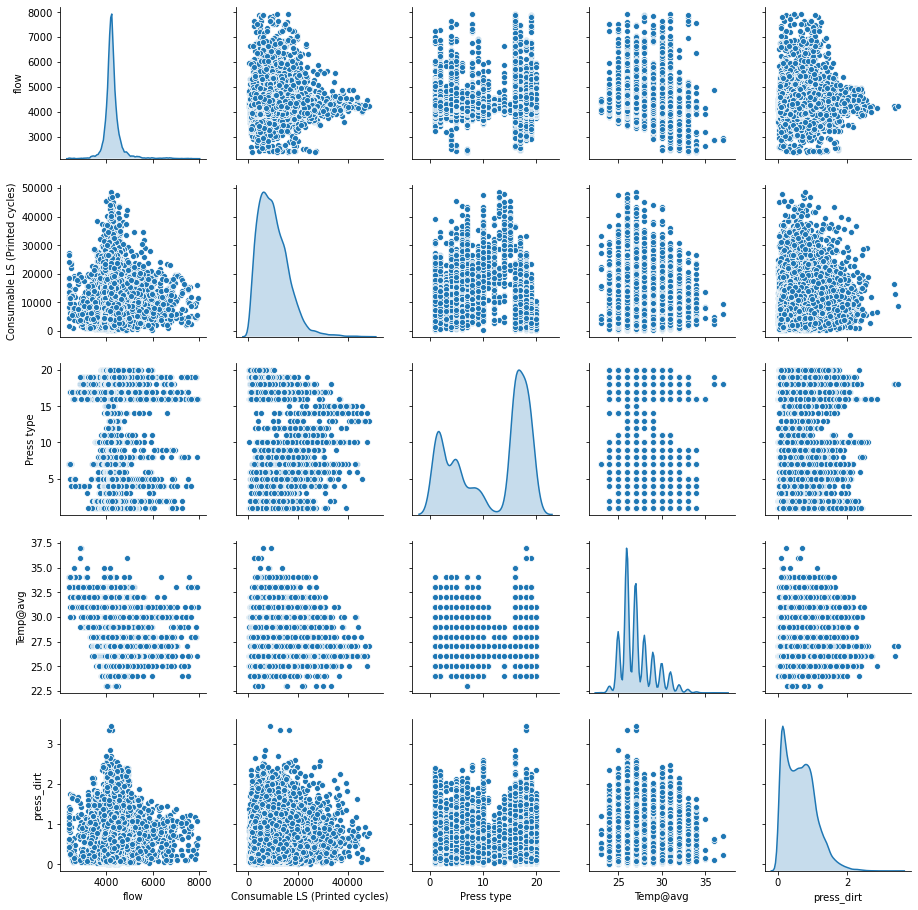

In [14]:
sns.pairplot(df, diag_kind="kde")

Press Type is uneven distributed

In [15]:
round(100*df["Press type"].value_counts()/len(df),1)

16    20.6
18    13.7
19    11.4
2     10.6
5      8.6
17     8.5
1      8.3
8      2.7
10     2.4
3      2.3
4      2.3
9      2.2
6      1.9
7      1.8
20     1.6
14     0.3
12     0.2
15     0.2
11     0.2
13     0.1
Name: Press type, dtype: float64

We are being asked for insights as to how to optimize our Consumable A LS, **for all press types**. Therefore, I won't delete any press type, even if there are statistically insignificant.

Text(0.5, 1.0, 'Correlation Matrix')

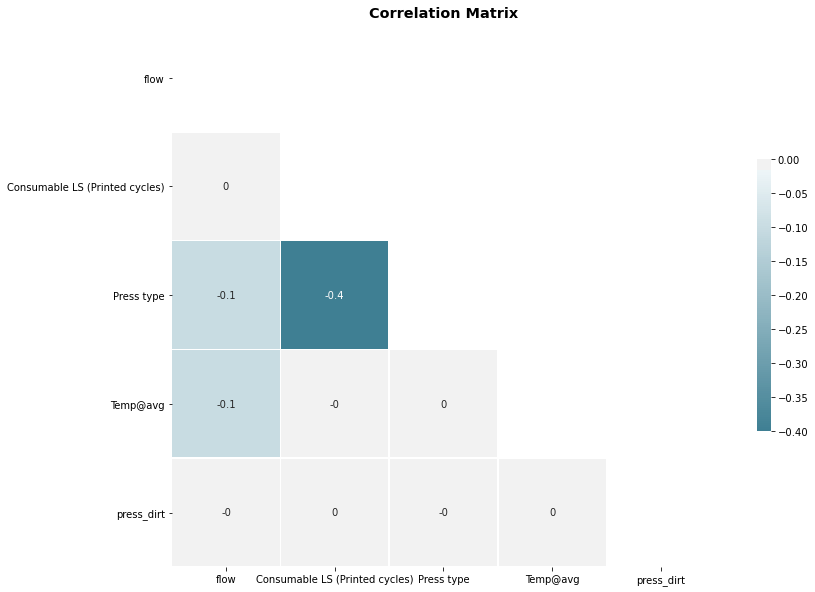

In [16]:
cor = df.corr().round(1)
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 10))
heatmap=sns.heatmap(cor,mask=mask,annot=True,annot_kws={"size": 10},
                    center=0,cmap=cmap,square=True, linewidths=.5,
                    cbar_kws={"shrink": .5},yticklabels=1,xticklabels=1)
plt.title("Correlation Matrix", fontsize='x-large', fontweight='bold')

Ce can see from heatmap that the highest correlate features are @ press type, but those values are seems low regarding to pearson correlation

<h3> <u>Another method to remove outliers - LOF<u> <h3>

In [17]:
from scipy import stats
z = np.abs(stats.zscore(df))
#define a threshold to identify an outlier
threshold = 3
df_outliers=df[(z < threshold).all(axis=1)]
Num_outliers=df.shape[0]-df_outliers.shape[0]
print("outliers by each feature boxplot: "+str(Num_outliers))
from sklearn.neighbors import LocalOutlierFactor
# fit the model for outlier detection (default)
n_outliers = Num_outliers
ground_truth = np.ones(len(df), dtype=int)
ground_truth[-n_outliers:] = -1
LOF = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = LOF.fit_predict(df)
n_errors = (y_pred != ground_truth).sum()
X_scores = LOF.negative_outlier_factor_
LOF_outliers=np.count_nonzero(y_pred == -1)
LOF_outliers_percentage=round(100*np.count_nonzero(y_pred == -1)/df.shape[0],0)
print("Number of outliers by LOF is "+str(LOF_outliers)+ ", Noise accounts for "+str(LOF_outliers_percentage)+"%  of the total dataset" )
df=df_outliers

outliers by each feature boxplot: 1015
Number of outliers by LOF is 2120, Noise accounts for 10.0%  of the total dataset


we can learn that local outliers (from each feature) does not predict the total outliers of the whole dataset by the combination of features. That is why we have more outliers by LOF than that shown in the boxplots above.

4.	<u>Fit several models and compare their performance.</u>



<h2> Normalize features <h2>

In [24]:
from sklearn.preprocessing import MinMaxScaler 
y=df["Consumable LS (Printed cycles)"]
X=df.drop(["Consumable LS (Printed cycles)"],axis=1)
numeric_df = X.select_dtypes(exclude="object")
scaler = MinMaxScaler(feature_range = (0,1))
normalized_df_data =scaler.fit_transform(numeric_df.values)
X=pd.DataFrame(normalized_df_data,columns=numeric_df.columns)
X.head()

,flow,Press type,Temp@avg,press_dirt
0,0.417439,0.473684,0.333333,0.177228
1,0.831929,0.210526,0.333333,0.131867
2,0.869840,0.210526,0.222222,0.056844
3,0.438922,0.842105,0.555556,0.523292
4,0.440185,0.842105,0.555556,0.691261


For insights as to how to optimize our Consumable A LS, the value itself of LS is not important - but it should not be less than 5000 and the average is 9500

In [25]:
print("max cycles:",max(y))
print("min cycles:",min(y))
y_labeles=["low","high"]
y_bins=[0,5000,max(y)+1]
y_bins = pd.cut(y, y_bins, labels=y_labeles)
y=y_bins
y_bins.head()

max cycles: 28247
min cycles: 337


0    high
1    high
4    high
6    high
7    high
Name: Consumable LS (Printed cycles), dtype: category
Categories (2, object): [low < high]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Training data shape: ', X_train.shape)
print('Testing data shape : ', X_test.shape)

Training data shape:  (16146, 4)
Testing data shape :  (4037, 4)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import class_weight
dfs = []
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
results = []
names = []
roc_aucs=[]
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
target_names = y_train.unique()
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        CM=confusion_matrix(y_test, y_pred)
        df_cm = pd.DataFrame(CM, index = ["Predicted Low","Predicted High"],
                          columns = ["Actual Low","Actual High"])
        print("Confusion Matrix:")
        print(df_cm)
        print("*************************************************************")
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)

LogReg
              precision    recall  f1-score   support

        high       0.78      1.00      0.87      3139
         low       0.00      0.00      0.00       898

    accuracy                           0.78      4037
   macro avg       0.39      0.50      0.44      4037
weighted avg       0.60      0.78      0.68      4037

Confusion Matrix:
                Actual Low  Actual High
Predicted Low         3139            0
Predicted High         898            0
*************************************************************
RF
              precision    recall  f1-score   support

        high       0.83      0.93      0.87      3139
         low       0.56      0.33      0.42       898

    accuracy                           0.79      4037
   macro avg       0.69      0.63      0.65      4037
weighted avg       0.77      0.79      0.77      4037

Confusion Matrix:
                Actual Low  Actual High
Predicted Low         2904          235
Predicted High         600          29

In [30]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

5. <u>Present your results and concluding insights with respect to the question posed. </u>

Now I have some robust data to plot and analyze. First, let’s plot our performance metrics from the 5-fold cross validation.

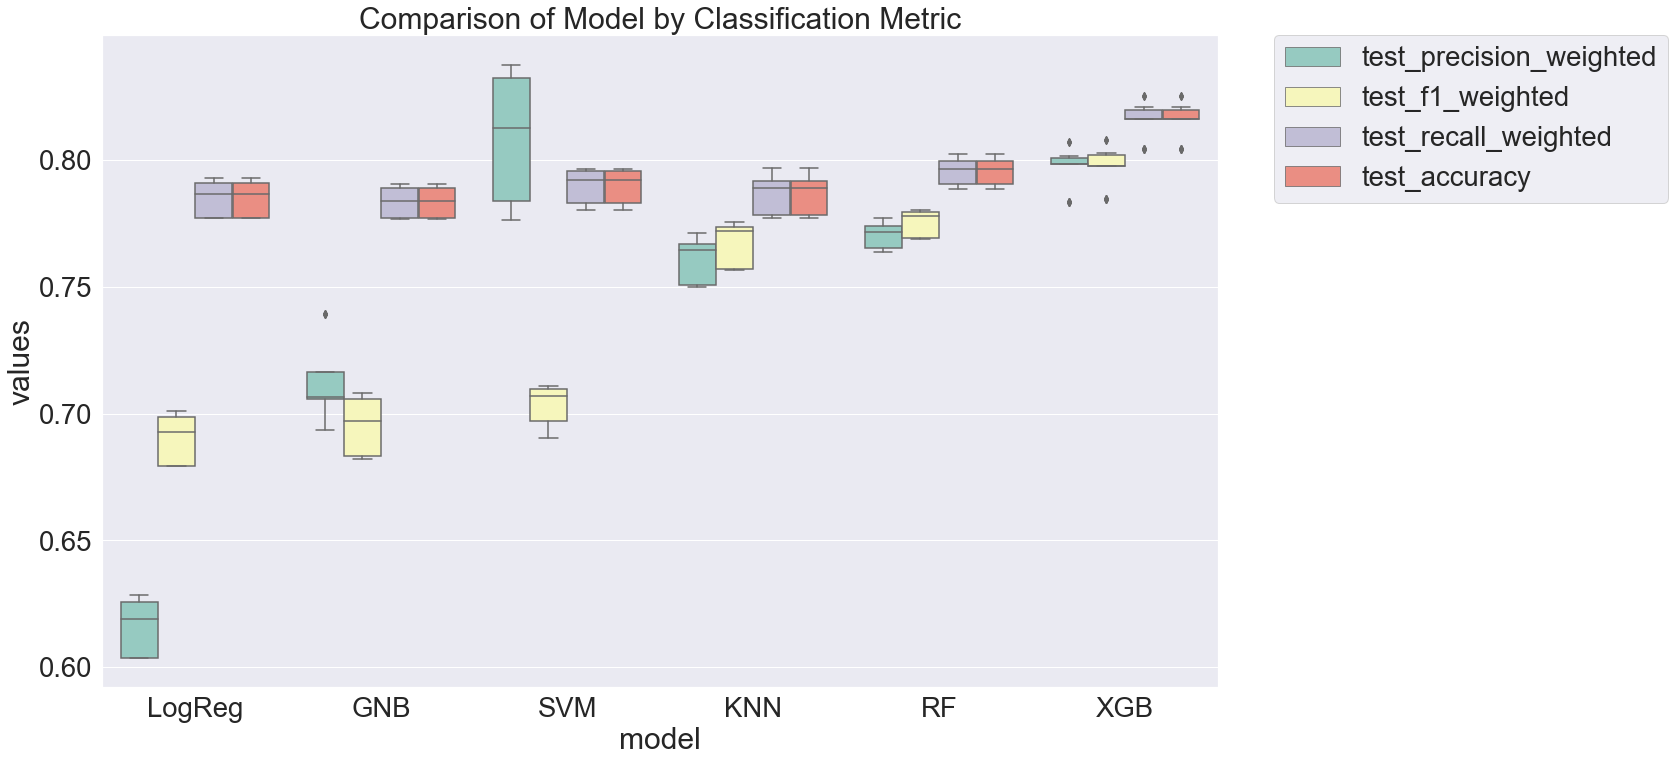

In [31]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

It is immediately clear that KNNs fit our data rather poorly across all metrics and that ensemble decision tree models (Random Forest, XGBoost) fit the data very well.

**<u>training and scoring times</u>**

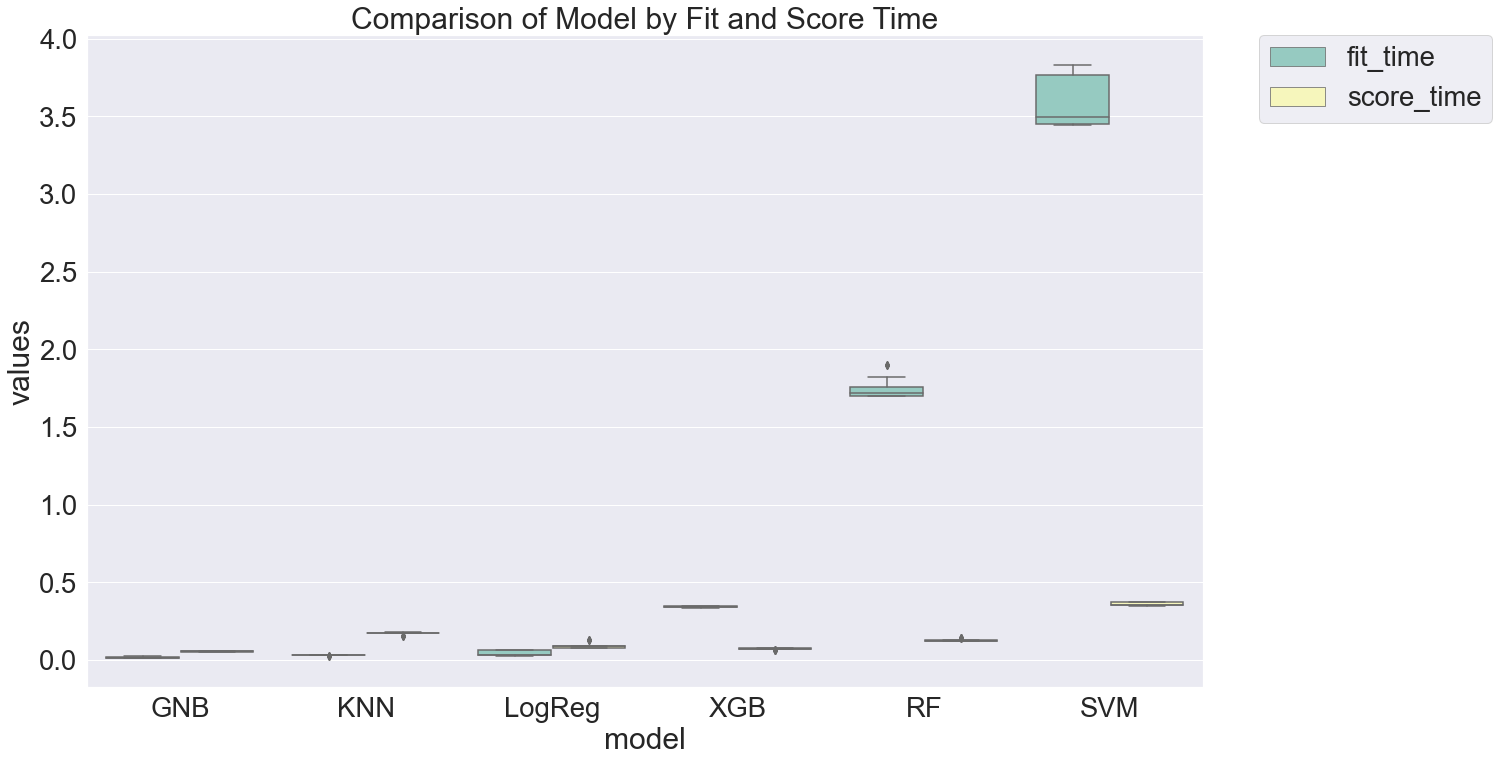

In [32]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

* Losigstic regression & Naive Bayes classifier are the worst performing models and slow to train/score!

* LogReg / SVM / GNB has recall = 1 - they predict "high" LS the worst or not at all
* XGBOOST is the best of all: one of the fastest to train and the best performing model. Random forest is not far away from XGBOOST. We generally see a trade-off in terms of performance and training time.

In [33]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_recall_weighted           test_precision_weighted            \
                        std      mean                     std      mean   
model                                                                     
GNB                0.005965  0.783595                0.014117  0.711947   
KNN                0.007822  0.787224                0.008773  0.760980   
LogReg             0.006062  0.784486                0.009502  0.615453   
RF                 0.005176  0.794787                0.005004  0.769723   
SVM                0.006584  0.789566                0.023881  0.807320   
XGB                0.006965  0.815694                0.007926  0.796735   

       test_accuracy           test_f1_weighted            
                 std      mean              std      mean  
model                                                      
GNB         0.005965  0.783595         0.010906  0.695631  
KNN         0.007822  0.787224         0.008458  0.767306  
LogReg      0.006062  0.784486         0.008314  0.689755  
RF          0.005176  0.794787         0.005058  0.774380  
SVM         0.006584  0.789566         0.007783  0.703060  
XGB         0.006965  0.815694         0.007651  0.797321

In [34]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

fit_time           score_time          
             std      mean        std      mean
model                                          
GNB     0.003668  0.018531   0.002683  0.056700
KNN     0.002800  0.030007   0.007605  0.171986
LogReg  0.016109  0.041910   0.017635  0.093104
RF      0.069004  1.752105   0.007495  0.130252
SVM     0.164662  3.588024   0.009966  0.359870
XGB     0.004834  0.342632   0.005329  0.071273

<h2><u> Conclusion</u><h2>
If I were to continue refining models - hyperparameters chosen by RandomizedSearchCV -  I would likely focus most of my effort on <u>XGBoost</u>
    

## Important Notes
- If you realize that steps 4 and 5 are more time demanding than the time permits, you can summarize your planned actions without implementing them in a script
- You can call us and ask as many questions as you need to understand the problem. 
- Alexandra 050-7445553, Tova 050-6913288
